Turqouise Bears - Jamie Tan, Yasmine Khalifa, Susov Dhakal, Tas Tudor

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress
import scipy.stats as st
from scipy import stats
from  math import radians, sin, cos, asin, sqrt
import re
import folium
from folium import plugins
from folium.plugins import HeatMap
import seaborn as sns

pd.set_option('display.max_columns', 500)

# Victorian Road Crash Statistics and Analysis

Road statistics are well reported, but are there trends and relationships around preventative measures such as speed limit restrictions, road upgrades and road safety cameras. We will be asking which one is the most effective at preventing incidents and what type of incidents.

We will be diving into the data to see if our hypothesis that road upgrades are likely to be the most effective.

Key questions to be considered are:

Is there a correlation between the number and type of road incidents and the speed limit? Eg - Fatalities / Serious injury / Minor or no injury as classified by VicRoads.
Does local government spending improve road conditions to prevent incidents?
Does the overall demographics (age / average income / gender) of local government areas have an impact on the number of incidents?
Do speed camera locations actually decrease crash numbers within a radius of 1km from the incidents v those outside 1 km of the speed camera?

## Section 1: Socio-economic Improvements

In [3]:
#Import the inital CSV
LGA_merged = pd.read_csv("Output/lgamerged.csv")

#Split the metro and regional areas for assistance in plotting below
LGA_merged_metro = LGA_merged.loc[LGA_merged["City_Regional"] == "Metro", :] 
LGA_merged_regional = LGA_merged.loc[LGA_merged["City_Regional"] == "Regional", :] 

##### Calculate and plot the overall statistics for the number of crashes per Local Government Agency

In [4]:
#Create a copy of the DF and then sort the values by total crashes in ascending by LGA
total_lga_plot = LGA_merged.copy()
total_lga_plot = total_lga_plot.sort_values("total_crashes")

#Calculate the average crashes for plotting
average_crash_plot = int(total_lga_plot["total_crashes"].mean())
print("Ave crashes per LGA: ", average_crash_plot)

Ave crashes per LGA:  797


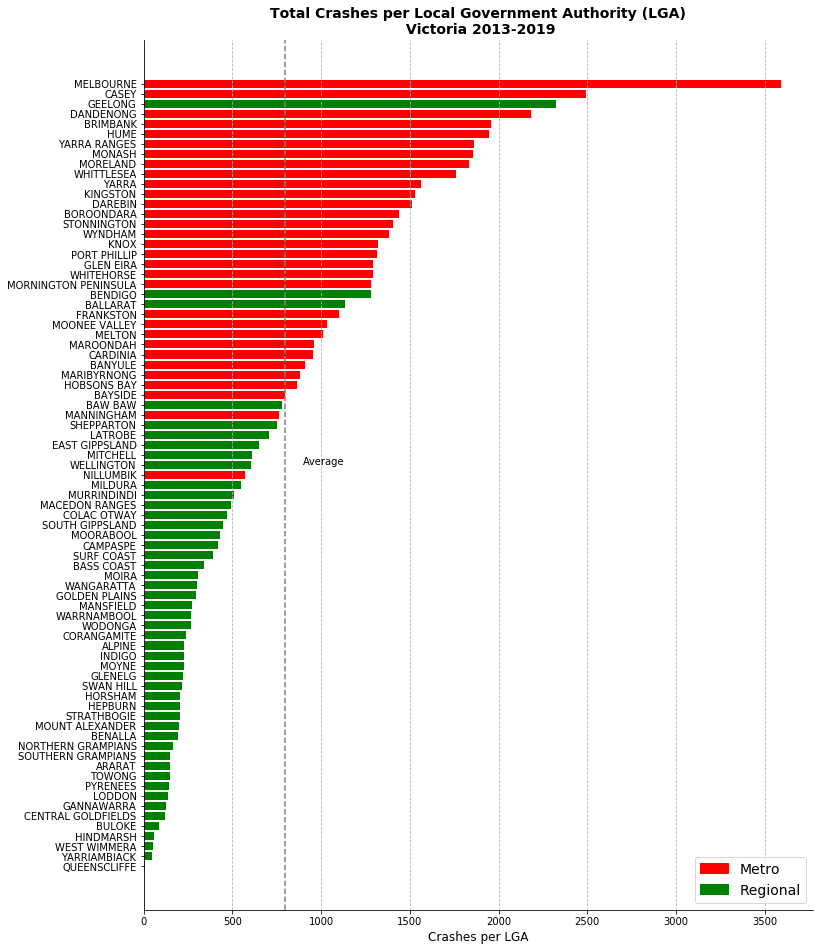

In [5]:
#Create a horizonal plot by LGA
plt.figure(figsize=(12,16))
colours = np.where(total_lga_plot["City_Regional"] == "Metro", "r", "g")
plt.barh(total_lga_plot["LGA"], total_lga_plot["total_crashes"], color=colours)

plt.title('Total Crashes per Local Government Authority (LGA)\n Victoria 2013-2019', fontsize=14, fontweight="bold")
plt.xlabel("Crashes per LGA", fontsize=12)

metro_patch_legend = mpatches.Patch(color="red", label="Metro")
regional_patch_legend = mpatches.Patch(color="green", label="Regional")
plt.legend(handles=[metro_patch_legend, regional_patch_legend], loc="lower right", fontsize=14)

plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.axvline(x=797, label='Average', c="grey", linestyle="--")
plt.annotate('Average',(900,40))

plt.gca().xaxis.grid(True, linestyle='--')

plt.show()

##### Explore crashes by LGA population for an overall persepective

In [6]:
#Calculate the correlation coefficient to see if there is a correlation between total population and the number of crashes
round(st.pearsonr(LGA_merged["Total_pop"], LGA_merged["total_crashes"])[0], 2)

0.89

In [7]:
#Calculate the linear regression for the total number of crashes for the population of victoria by LGA
summary_slope, summary_int, summary_r, summary_p, summary_std_err = stats.linregress(LGA_merged["Total_pop"], LGA_merged["total_crashes"])

In [8]:
#Equation of the line to calculate the predicted number of crashes for the population of victoria by LGA
pop_summary_fit = summary_slope * LGA_merged["Total_pop"] + summary_int

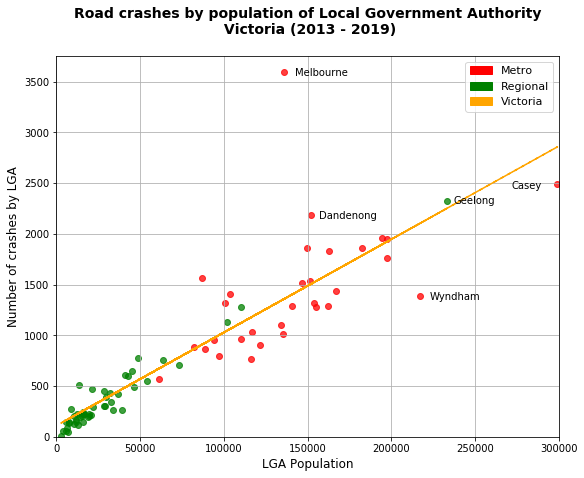

In [9]:
#Plot the linear model on the scatter plot
plt.figure(figsize=(9,7))
plt.scatter(LGA_merged_metro["Total_pop"], LGA_merged_metro["total_crashes"], facecolors=["red"], alpha = 0.75)
plt.scatter(LGA_merged_regional["Total_pop"], LGA_merged_regional["total_crashes"], facecolors=["green"], alpha = 0.75)
plt.plot(LGA_merged["Total_pop"], pop_summary_fit, "--", color="orange")

plt.xlabel("LGA Population", fontsize=12)
plt.ylabel("Number of crashes by LGA", fontsize=12)
plt.title("Road crashes by population of Local Government Authority\n Victoria (2013 - 2019)\n", fontsize=14, fontweight="bold")

metro_patch_legend_tp = mpatches.Patch(color="red", label="Metro")
regional_patch_legend_tp = mpatches.Patch(color="green", label="Regional")
overall_patch_legend_tp = mpatches.Patch(color="orange", label="Victoria")
plt.legend(handles=[metro_patch_legend_tp, regional_patch_legend_tp, overall_patch_legend_tp], loc="upper right", fontsize=11)


plt.annotate('Melbourne',(142500,3560))
plt.annotate('Casey',(272000,2450))
plt.annotate('Wyndham',(223000,1350))
plt.annotate('Geelong',(237000,2300))
plt.annotate('Dandenong',(157000,2150))

plt.xlim(0,300000)
plt.ylim(0,3750)
plt.grid()
plt.show()

##### Explore total crashes by LGA Index of Relative Socio-Economic Disadvantage (IRSD) - economic index

In [10]:
#Calculate the correlation coefficient to see if there is a correlation between socio status and the number of crashes
round(st.pearsonr(LGA_merged["Index of Relative Socio-Economic Disadvantage (IRSD)"], LGA_merged["total_crashes"])[0], 2)

0.25

In [11]:
#BY METRO
#Calculate the linear regression for the total number of crashes for the population of victoria by LGA (Metro)
IRSD_slope_m, IRSD_int_m, IRSD_r_m, IRSD_p_m, IRSD_std_err_m = stats.linregress(LGA_merged_metro["Index of Relative Socio-Economic Disadvantage (IRSD)"], LGA_merged_metro["total_crashes"])

#Equation of the line to calculate the predicted number of crashes for the population of victoria by LGA (Metro)
IRSD_summary_fit_m = IRSD_slope_m * LGA_merged_metro["Index of Relative Socio-Economic Disadvantage (IRSD)"] + IRSD_int_m

In [12]:
#BY REGIONAL
#Calculate the linear regression for the total number of crashes for the population of victoria by LGA (regional)
IRSD_slope_r, IRSD_int_r, IRSD_r_r, IRSD_p_r, IRSD_std_err_r = stats.linregress(LGA_merged_regional["Index of Relative Socio-Economic Disadvantage (IRSD)"], LGA_merged_regional["total_crashes"])

#Equation of the line to calculate the predicted number of crashes for the population of victoria by LGA (regional)
IRSD_summary_fit_r = IRSD_slope_r * LGA_merged_regional["Index of Relative Socio-Economic Disadvantage (IRSD)"] + IRSD_int_r

In [13]:
#OVERALL
#Calculate the linear regression for the total number of crashes for the population of victoria by LGA
IRSD_slope, IRSD_int, IRSD_r, IRSD_p, IRSD_std_err = stats.linregress(LGA_merged["Index of Relative Socio-Economic Disadvantage (IRSD)"], LGA_merged["total_crashes"])

#Equation of the line to calculate the predicted number of crashes for the population of victoria by LGA
IRSD_summary_fit = IRSD_slope * LGA_merged["Index of Relative Socio-Economic Disadvantage (IRSD)"] + IRSD_int

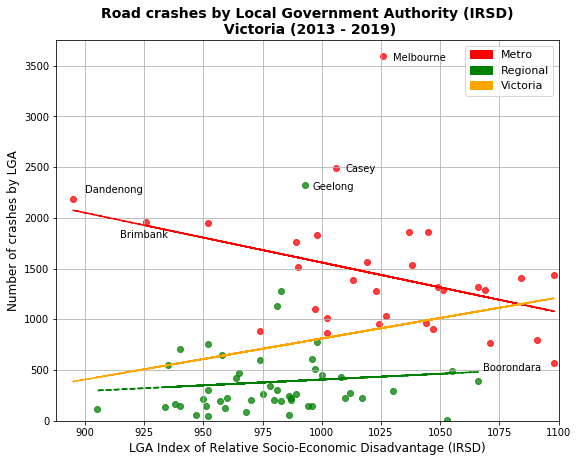

In [14]:
#Plot the linear model on the scatter plot
plt.figure(figsize=(9,7))
plt.scatter(LGA_merged_metro["Index of Relative Socio-Economic Disadvantage (IRSD)"], LGA_merged_metro["total_crashes"], facecolors="red", alpha = 0.75)
plt.scatter(LGA_merged_regional["Index of Relative Socio-Economic Disadvantage (IRSD)"], LGA_merged_regional["total_crashes"], facecolors="green", alpha = 0.75)
plt.plot(LGA_merged_metro["Index of Relative Socio-Economic Disadvantage (IRSD)"], IRSD_summary_fit_m, "--", color="red")
plt.plot(LGA_merged_regional["Index of Relative Socio-Economic Disadvantage (IRSD)"], IRSD_summary_fit_r, "--", color="green")
plt.plot(LGA_merged["Index of Relative Socio-Economic Disadvantage (IRSD)"], IRSD_summary_fit, "--", color="orange")

plt.xlabel("LGA Index of Relative Socio-Economic Disadvantage (IRSD)", fontsize=12)
plt.ylabel("Number of crashes by LGA", fontsize=12)
plt.title("Road crashes by Local Government Authority (IRSD)\n Victoria (2013 - 2019)", fontsize=14, fontweight="bold")

metro_patch_legend_IRSD = mpatches.Patch(color="red", label="Metro")
regional_patch_legend_IRSD = mpatches.Patch(color="green", label="Regional")
overall_patch_legend_IRSD = mpatches.Patch(color="orange", label="Victoria")
plt.legend(handles=[metro_patch_legend_IRSD, regional_patch_legend_IRSD, overall_patch_legend_IRSD], loc="upper right", fontsize=11)


plt.annotate('Melbourne',(1030,3550))
plt.annotate('Dandenong',(900, 2250))
plt.annotate('Boorondara',(1068, 493))
plt.annotate('Brimbank',(915, 1800))
plt.annotate('Casey',(1010, 2450))
plt.annotate('Geelong',(996, 2277))

plt.xlim(888,1100)
plt.ylim(0,3750)
plt.grid()
plt.show()

##### Explore total crashes by each LGA's median income (not used for presentation)

In [15]:
#Calculate the correlation coefficient to see if there is a correlation between socio status and the number of crashes
round(st.pearsonr(LGA_merged["Median household income"], LGA_merged["total_crashes"])[0], 2)

0.54

In [16]:
#BY METRO
#Calculate the linear regression for the total number of crashes for the population of victoria by LGA (Metro)
med_income_slope_m, med_income_int_m, med_income_r_m, med_income_p_m, med_income_std_err_m = stats.linregress(LGA_merged_metro["Median household income"], LGA_merged_metro["total_crashes"])

#Equation of the line to calculate the predicted number of crashes for the population of victoria by LGA (Metro)
med_income_fit_m = med_income_slope_m * LGA_merged_metro["Median household income"] + med_income_int_m

In [17]:
#BY REGIONAL
#Calculate the linear regression for the total number of crashes for the population of victoria by LGA (Regioanl)
med_income_slope_r, med_income_int_r, med_income_r_r, med_income_p_r, med_income_std_err_r = stats.linregress(LGA_merged_regional["Median household income"], LGA_merged_regional["total_crashes"])

#Equation of the line to calculate the predicted number of crashes for the population of victoria by LGA (Regional)
med_income_fit_r = med_income_slope_r * LGA_merged_regional["Median household income"] + med_income_int_r

In [18]:
#OVERALL
#Calculate the linear regression for the total number of crashes for the population of victoria by LGA (Overall)
med_income_slope, med_income_int, med_income_r, med_income_p, med_income_std_err = stats.linregress(LGA_merged["Median household income"], LGA_merged["total_crashes"])

#Equation of the line to calculate the predicted number of crashes for the population of victoria by LGA (Overall)
med_income_fit = med_income_slope * LGA_merged["Median household income"] + med_income_int

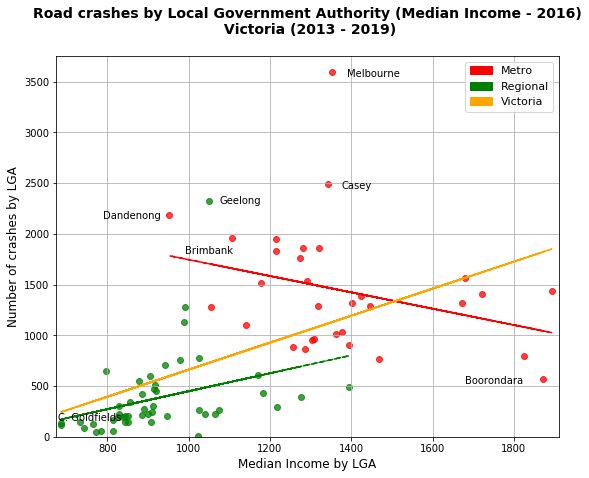

In [19]:
#Plot the linear model on the scatter plot
plt.figure(figsize=(9,7))
plt.scatter(LGA_merged_metro["Median household income"], LGA_merged_metro["total_crashes"], facecolors="red", alpha = 0.75)
plt.scatter(LGA_merged_regional["Median household income"], LGA_merged_regional["total_crashes"], facecolors="green", alpha = 0.75)
plt.plot(LGA_merged_metro["Median household income"], med_income_fit_m, "--", color="red")
plt.plot(LGA_merged_regional["Median household income"], med_income_fit_r, "--", color="green")
plt.plot(LGA_merged["Median household income"], med_income_fit, "--", color="orange")

plt.xlabel("Median Income by LGA", fontsize=12)
plt.ylabel("Number of crashes by LGA", fontsize=12)
plt.title("Road crashes by Local Government Authority (Median Income - 2016)\n Victoria (2013 - 2019)\n", fontsize=14, fontweight="bold")

metro_patch_legend_med = mpatches.Patch(color="red", label="Metro")
regional_patch_legend_med = mpatches.Patch(color="green", label="Regional")
overall_patch_legend_med = mpatches.Patch(color="orange", label="Victoria")
plt.legend(handles=[metro_patch_legend_med, regional_patch_legend_med, overall_patch_legend_med], loc="upper right", fontsize=11)

plt.annotate('Melbourne',(1390,3550))
plt.annotate('Dandenong',(790, 2150))
plt.annotate('Boorondara',(1680, 525))
plt.annotate('Brimbank',(990, 1800))
plt.annotate('C. Goldfields',(680, 160))
plt.annotate('Casey',(1375, 2450))
plt.annotate('Geelong',(1075, 2300))

plt.xlim(675,1910)
plt.ylim(0,3750)
plt.grid()
plt.show()

##### Number of alcohol incidents by socio economic status of LGA

In [20]:
#Calculate the correlation coefficient to see if there is a correlation between socio status and the number of crashes
round(st.pearsonr(LGA_merged["Index of Relative Socio-Economic Disadvantage (IRSD)"], LGA_merged["alcohol"])[0], 2)

0.09

In [21]:
#Overall
#Calculate the linear regression for the total number of crashes for the population of victoria by LGA (Overall)
booze_slope, booze_int, boze_r, booze_p, booze_std_err = stats.linregress(LGA_merged["Index of Relative Socio-Economic Disadvantage (IRSD)"], LGA_merged["alcohol"])

#Equation of the line to calculate the predicted number of crashes for the population of victoria by LGA (Overall)
booze_fit = booze_slope * LGA_merged["Index of Relative Socio-Economic Disadvantage (IRSD)"] + booze_int

In [22]:
#BY METRO
#Calculate the linear regression for the total number of crashes for the population of victoria by LGA (Metro)
booze_slope_m, booze_int_m, boze_r_m, booze_p_m, booze_std_err_m = stats.linregress(LGA_merged_metro["Index of Relative Socio-Economic Disadvantage (IRSD)"], LGA_merged_metro["alcohol"])

#Equation of the line to calculate the predicted number of crashes for the population of victoria by LGA (Metro)
booze_fit_m = booze_slope_m * LGA_merged_metro["Index of Relative Socio-Economic Disadvantage (IRSD)"] + booze_int_m

In [23]:
#BY REGIONAL
#Calculate the linear regression for the total number of crashes for the population of victoria by LGA (Regional)
booze_slope_r, booze_int_r, boze_r_r, booze_p_r, booze_std_err_r = stats.linregress(LGA_merged_regional["Index of Relative Socio-Economic Disadvantage (IRSD)"], LGA_merged_regional["alcohol"])

#Equation of the line to calculate the predicted number of crashes for the population of victoria by LGA (Regional)
booze_fit_r = booze_slope_r * LGA_merged_regional["Index of Relative Socio-Economic Disadvantage (IRSD)"] + booze_int_r

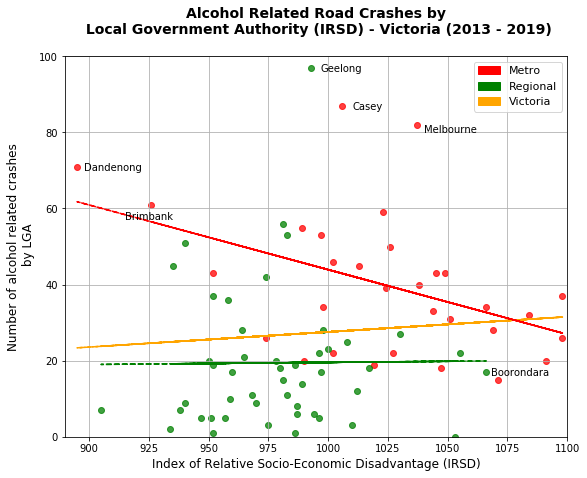

In [24]:
#Plot the linear model on the scatter plot
plt.figure(figsize=(9,7))
plt.scatter(LGA_merged_metro["Index of Relative Socio-Economic Disadvantage (IRSD)"], LGA_merged_metro["alcohol"], facecolors="red", alpha = 0.75)
plt.scatter(LGA_merged_regional["Index of Relative Socio-Economic Disadvantage (IRSD)"], LGA_merged_regional["alcohol"], facecolors="green", alpha = 0.75)
plt.plot(LGA_merged["Index of Relative Socio-Economic Disadvantage (IRSD)"], booze_fit, "--", color="orange")
plt.plot(LGA_merged_metro["Index of Relative Socio-Economic Disadvantage (IRSD)"], booze_fit_m, "--", color="red")
plt.plot(LGA_merged_regional["Index of Relative Socio-Economic Disadvantage (IRSD)"], booze_fit_r, "--", color="green")

plt.xlabel("Index of Relative Socio-Economic Disadvantage (IRSD)", fontsize=12)
plt.ylabel("Number of alcohol related crashes\n by LGA", fontsize=12)
plt.title("Alcohol Related Road Crashes by\n Local Government Authority (IRSD) - Victoria (2013 - 2019)\n", fontsize=14, fontweight="bold")

metro_patch_legend_booze = mpatches.Patch(color="red", label="Metro")
regional_patch_legend_booze = mpatches.Patch(color="green", label="Regional")
overall_patch_legend_booze = mpatches.Patch(color="orange", label="Victoria")
plt.legend(handles=[metro_patch_legend_booze, regional_patch_legend_booze, overall_patch_legend_booze], loc="upper right", fontsize=11)

plt.annotate('Melbourne',(1040,80))
plt.annotate('Dandenong',(898, 70))
plt.annotate('Boorondara',(1068, 16))
plt.annotate('Brimbank',(915, 57))
plt.annotate('C. Goldfields',(878, 9))
plt.annotate('Casey',(1010, 86))
plt.annotate('Geelong',(997, 96))


plt.xlim(890,1100)
plt.ylim(0,100)
plt.grid()
plt.show()

##### Number of alcohol incidents by people reporting to be of fair or poor health in each LGA (Not used for the presentation)

In [25]:
#Calculate the correlation coefficient to see if there is a correlation between the health in a LGA and the number of crashes
round(st.pearsonr(LGA_merged["People reporting fair or poor health status"], LGA_merged["total_crashes"])[0], 2)

0.26

In [26]:
#OVERALL
#Calculate the linear regression for the total number of crashes for the population of victoria by LGA
health_slope, health_int, health_r, health_p, health_std_err = stats.linregress(LGA_merged["People reporting fair or poor health status"], LGA_merged["total_crashes"])

#Equation of the line to calculate the predicted number of crashes for the people of fair or poor health in victoria by LGA
health_fit = health_slope * LGA_merged["People reporting fair or poor health status"] + health_int

In [27]:
#METRO
#Calculate the linear regression for the total number of crashes for the population of victoria by LGA
health_slope_m, health_int_m, health_r_m, health_p_m, health_std_err_m = stats.linregress(LGA_merged_metro["People reporting fair or poor health status"], LGA_merged_metro["total_crashes"])

#Equation of the line to calculate the predicted number of crashes for the people of fair or poor health in victoria by LGA
health_fit_m = health_slope_m * LGA_merged_metro["People reporting fair or poor health status"] + health_int_m

In [28]:
#REGIONAL
#Calculate the linear regression for the total number of crashes for the population of victoria by LGA
health_slope_r, health_int_r, health_r_r, health_p_r, health_std_err_r = stats.linregress(LGA_merged_regional["People reporting fair or poor health status"], LGA_merged_regional["total_crashes"])

#Equation of the line to calculate the predicted number of crashes for the people of fair or poor health in victoria by LGA
health_fit_r = health_slope_r * LGA_merged_regional["People reporting fair or poor health status"] + health_int_r

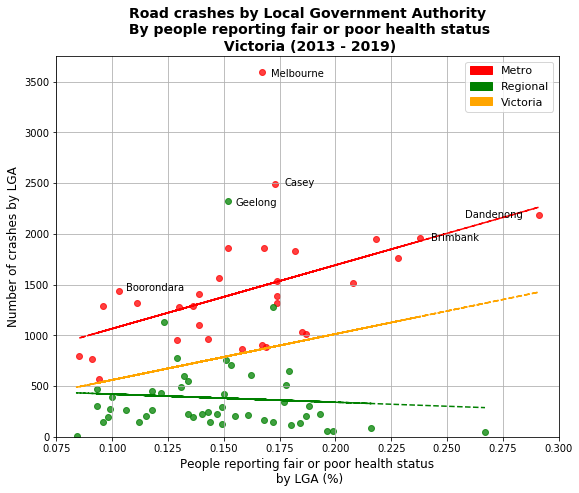

In [29]:
#Plot the linear model on the scatter plot
plt.figure(figsize=(9,7))
plt.scatter(LGA_merged_metro["People reporting fair or poor health status"], LGA_merged_metro["total_crashes"], facecolors="red", alpha = 0.75)
plt.scatter(LGA_merged_regional["People reporting fair or poor health status"], LGA_merged_regional["total_crashes"], facecolors="green", alpha = 0.75)
plt.plot(LGA_merged["People reporting fair or poor health status"], health_fit, "--", color="orange")
plt.plot(LGA_merged_metro["People reporting fair or poor health status"], health_fit_m, "--", color="red")
plt.plot(LGA_merged_regional["People reporting fair or poor health status"], health_fit_r, "--", color="green")

plt.xlabel("People reporting fair or poor health status\n by LGA (%)", fontsize=12)
plt.ylabel("Number of crashes by LGA", fontsize=12)
plt.title("Road crashes by Local Government Authority\n By people reporting fair or poor health status\n Victoria (2013 - 2019)", fontsize=14, fontweight="bold")

metro_patch_legend_health = mpatches.Patch(color="red", label="Metro")
regional_patch_legend_health = mpatches.Patch(color="green", label="Regional")
overall_patch_legend_health = mpatches.Patch(color="orange", label="Victoria")
plt.legend(handles=[metro_patch_legend_health, regional_patch_legend_health, overall_patch_legend_health], loc="upper right", fontsize=11)

plt.annotate('Melbourne',(0.171,3550))
plt.annotate('Dandenong',(.258, 2160))
plt.annotate('Boorondara',(0.106, 1440))
plt.annotate('Brimbank',(0.243, 1930))
plt.annotate('Casey',(0.177, 2470))
plt.annotate('Geelong',(0.155, 2280))

plt.xlim(0.075,.3)
plt.ylim(0,3750)
plt.grid()
plt.show()

##### Represent the crashes per person in an LGA to see if there are more or less crashes per person (cpp) to socio factors

In [30]:
#Calculate the correlation coefficient to see if there is a correlation between socio status and the number of crashes
round(st.pearsonr(LGA_merged["Index of Relative Socio-Economic Disadvantage (IRSD)"], LGA_merged["crash_per_person"])[0], 2)

-0.15

In [31]:
#Calculate the linear regression for the total number of crashes for the population of victoria by LGA (Overall)
cpp_slope, cpp_int, cpp_r, cpp_p, cpp_std_err = stats.linregress(LGA_merged["Index of Relative Socio-Economic Disadvantage (IRSD)"], LGA_merged["crash_per_person"])

#Equation of the line to calculate the predicted number of crashes for the population of victoria by LGA (Overall)
cpp_fit = cpp_slope * LGA_merged["Index of Relative Socio-Economic Disadvantage (IRSD)"] + cpp_int

In [32]:
#METRO
#Calculate the linear regression for the total number of crashes for the population of victoria by LGA (Metro)
cpp_slope_m, cpp_int_m, cpp_r_m, cpp_p_m, cpp_std_err_m = stats.linregress(LGA_merged_metro["Index of Relative Socio-Economic Disadvantage (IRSD)"], LGA_merged_metro["crash_per_person"])

#Equation of the line to calculate the predicted number of crashes for the population of victoria by LGA (Metro)
cpp_fit_m = cpp_slope_m * LGA_merged_metro["Index of Relative Socio-Economic Disadvantage (IRSD)"] + cpp_int_m

In [33]:
#Calculate the linear regression for the total number of crashes for the population of victoria by LGA (Regional)
cpp_slope_r, cpp_int_r, cpp_r_r, cpp_p_r, cpp_std_err_r = stats.linregress(LGA_merged_regional["Index of Relative Socio-Economic Disadvantage (IRSD)"], LGA_merged_regional["crash_per_person"])

#Equation of the line to calculate the predicted number of crashes for the population of victoria by LGA (Regional)
cpp_fit_r = cpp_slope_r * LGA_merged_regional["Index of Relative Socio-Economic Disadvantage (IRSD)"] + cpp_int_r

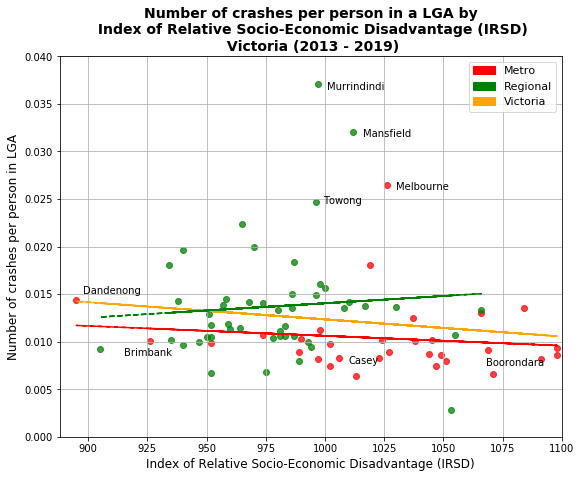

In [34]:
#Plot the linear model on the scatter plot
plt.figure(figsize=(9,7))
plt.scatter(LGA_merged_metro["Index of Relative Socio-Economic Disadvantage (IRSD)"], LGA_merged_metro["crash_per_person"], facecolors="red", alpha = 0.75)
plt.scatter(LGA_merged_regional["Index of Relative Socio-Economic Disadvantage (IRSD)"], LGA_merged_regional["crash_per_person"], facecolors="green", alpha = 0.75)
plt.plot(LGA_merged["Index of Relative Socio-Economic Disadvantage (IRSD)"], cpp_fit, "--", color="orange")
plt.plot(LGA_merged_metro["Index of Relative Socio-Economic Disadvantage (IRSD)"], cpp_fit_m, "--", color="red")
plt.plot(LGA_merged_regional["Index of Relative Socio-Economic Disadvantage (IRSD)"], cpp_fit_r, "--", color="green")

plt.xlabel("Index of Relative Socio-Economic Disadvantage (IRSD)", fontsize=12)
plt.ylabel("Number of crashes per person in LGA", fontsize=12)
plt.title("Number of crashes per person in a LGA by\n Index of Relative Socio-Economic Disadvantage (IRSD)\n Victoria (2013 - 2019)", fontsize=14, fontweight="bold")

metro_patch_legend_cpp = mpatches.Patch(color="red", label="Metro")
regional_patch_legend_cpp = mpatches.Patch(color="green", label="Regional")
overall_patch_legend_cpp = mpatches.Patch(color="orange", label="Victoria")
plt.legend(handles=[metro_patch_legend_cpp, regional_patch_legend_cpp, overall_patch_legend_cpp], loc="upper right", fontsize=11)

plt.annotate('Melbourne',(1030,0.026))
plt.annotate('Dandenong',(898, 0.015))
plt.annotate('Boorondara',(1068, 0.0075))
plt.annotate('Brimbank',(915, 0.0085))
plt.annotate('C. Goldfields',(876, .0077))
plt.annotate('Casey',(1010, 0.0077))
plt.annotate('Murrindindi',(1001, 0.0365))
plt.annotate('Mansfield',(1016, 0.0315))
plt.annotate('Towong',(999, 0.0245))

plt.xlim(888,1100)
plt.ylim(0,0.04)
plt.grid()
plt.show()

##### Represent the crashes per person in an LGA to see if there are more or less crashes per person (cpp) for LGA alcohol factors

In [35]:
#Calculate the correlation coefficient to see if there is a correlation between alcohol related incidents
#and the number of crashes person (OVERALL)
round(st.pearsonr(LGA_merged["Clients that received Alcohol & Drug Treatment Services per 1,000 population"], LGA_merged["crash_per_person"])[0], 2)

-0.14

In [36]:
#OVERALL
#Calculate the linear regression for the total number of crashes for the population of victoria by LGA (Overall)
cpp_alcohol_slope, cpp_alcohol_int, cpp_alcohol_r, cpp_alcohol_p, cpp_alcohol_std_err = stats.linregress(LGA_merged["Clients that received Alcohol & Drug Treatment Services per 1,000 population"], LGA_merged["crash_per_person"])

#Equation of the line to calculate the predicted number of crashes for the population of victoria by LGA (Overall)
cpp_alcohol_fit = cpp_alcohol_slope * LGA_merged["Clients that received Alcohol & Drug Treatment Services per 1,000 population"] + cpp_alcohol_int

In [37]:
#METRO
#Calculate the linear regression for the total number of crashes for the population of victoria by LGA (Metro)
cpp_alcohol_slope_m, cpp_alcohol_int_m, cpp_alcohol_r_m, cpp_alcohol_p_m, cpp_alcohol_std_err_m = stats.linregress(LGA_merged_metro["Clients that received Alcohol & Drug Treatment Services per 1,000 population"], LGA_merged_metro["crash_per_person"])

#Equation of the line to calculate the predicted number of crashes for the population of victoria by LGA (Metro)
cpp_alcohol_fit_m = cpp_alcohol_slope_m * LGA_merged_metro["Clients that received Alcohol & Drug Treatment Services per 1,000 population"] + cpp_alcohol_int_m

In [38]:
#METRO
#Calculate the linear regression for the total number of crashes for the population of victoria by LGA (Regional)
cpp_alcohol_slope_r, cpp_alcohol_int_r, cpp_alcohol_r_r, cpp_alcohol_p_r, cpp_alcohol_std_err_r = stats.linregress(LGA_merged_regional["Clients that received Alcohol & Drug Treatment Services per 1,000 population"], LGA_merged_regional["crash_per_person"])

#Equation of the line to calculate the predicted number of crashes for the population of victoria by LGA (Regional)
cpp_alcohol_fit_r = cpp_alcohol_slope_r * LGA_merged_regional["Clients that received Alcohol & Drug Treatment Services per 1,000 population"] + cpp_alcohol_int_r

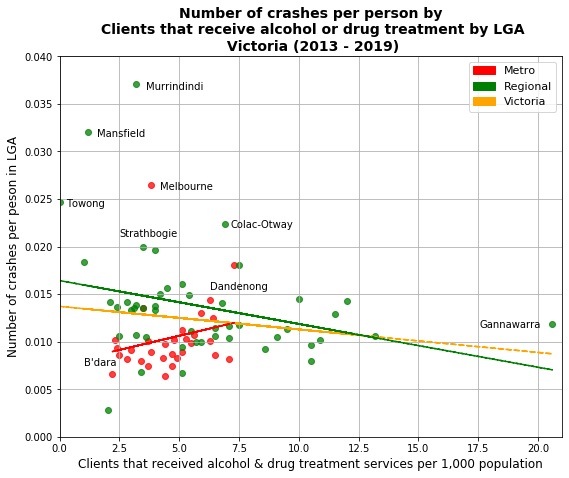

In [39]:
#Plot the linear model on the scatter plot
plt.figure(figsize=(9,7))
plt.scatter(LGA_merged_metro["Clients that received Alcohol & Drug Treatment Services per 1,000 population"], LGA_merged_metro["crash_per_person"], facecolors="red", alpha = 0.75)
plt.scatter(LGA_merged_regional["Clients that received Alcohol & Drug Treatment Services per 1,000 population"], LGA_merged_regional["crash_per_person"], facecolors="green", alpha = 0.75)
plt.plot(LGA_merged["Clients that received Alcohol & Drug Treatment Services per 1,000 population"], cpp_alcohol_fit, "--", color="orange")
plt.plot(LGA_merged_metro["Clients that received Alcohol & Drug Treatment Services per 1,000 population"], cpp_alcohol_fit_m, "--", color="red")
plt.plot(LGA_merged_regional["Clients that received Alcohol & Drug Treatment Services per 1,000 population"], cpp_alcohol_fit_r, "--", color="green")

plt.xlabel("Clients that received alcohol & drug treatment services per 1,000 population", fontsize=12)
plt.ylabel("Number of crashes per peson in LGA", fontsize=12)
plt.title("Number of crashes per person by\n Clients that receive alcohol or drug treatment by LGA\n Victoria (2013 - 2019)", fontsize=14, fontweight="bold")

metro_patch_legend_cpp_alc = mpatches.Patch(color="red", label="Metro")
regional_patch_legend_cpp_alc = mpatches.Patch(color="green", label="Regional")
overall_patch_legend_cpp_alc = mpatches.Patch(color="orange", label="Victoria")
plt.legend(handles=[metro_patch_legend_cpp_alc, regional_patch_legend_cpp_alc, overall_patch_legend_cpp_alc], loc="upper right", fontsize=11)

plt.annotate('Melbourne',(4.2,0.026))
plt.annotate('Dandenong',(6.3, 0.0155))
plt.annotate("B'dara",(1, 0.0075))
plt.annotate('Mansfield',(1.55, 0.0315))
plt.annotate('Gannawarra',(17.55, 0.0115))
plt.annotate('Murrindindi',(3.6, 0.0365))
plt.annotate('Colac-Otway',(7.15, 0.022))
plt.annotate('Strathbogie',(2.5, 0.021))
plt.annotate('Towong',(0.249, 0.0242))


plt.xlim(0,21)
plt.ylim(0,0.04)
plt.grid()
plt.show()

Number of alcohol incidents by socio economic status of LGA

In [40]:
#Calculate the correlation coefficient to see if there is a correlation between socio status and the number of crashes
round(st.pearsonr(LGA_merged["Index of Relative Socio-Economic Disadvantage (IRSD)"], LGA_merged["alcohol"])[0], 2)

0.09

In [41]:
#Overall
#Calculate the linear regression for the total number of crashes for the population of victoria by LGA (Overall)
booze_slope, booze_int, boze_r, booze_p, booze_std_err = stats.linregress(LGA_merged["Index of Relative Socio-Economic Disadvantage (IRSD)"], LGA_merged["alcohol"])

#Equation of the line to calculate the predicted number of crashes for the population of victoria by LGA (Overall)
booze_fit = booze_slope * LGA_merged["Index of Relative Socio-Economic Disadvantage (IRSD)"] + booze_int

In [42]:
#BY METRO
#Calculate the linear regression for the total number of crashes for the population of victoria by LGA (Metro)
booze_slope_m, booze_int_m, boze_r_m, booze_p_m, booze_std_err_m = stats.linregress(LGA_merged_metro["Index of Relative Socio-Economic Disadvantage (IRSD)"], LGA_merged_metro["alcohol"])

#Equation of the line to calculate the predicted number of crashes for the population of victoria by LGA (Metro)
booze_fit_m = booze_slope_m * LGA_merged_metro["Index of Relative Socio-Economic Disadvantage (IRSD)"] + booze_int_m

In [43]:
#BY REGIONAL
#Calculate the linear regression for the total number of crashes for the population of victoria by LGA (Regional)
booze_slope_r, booze_int_r, boze_r_r, booze_p_r, booze_std_err_r = stats.linregress(LGA_merged_regional["Index of Relative Socio-Economic Disadvantage (IRSD)"], LGA_merged_regional["alcohol"])

#Equation of the line to calculate the predicted number of crashes for the population of victoria by LGA (Regional)
booze_fit_r = booze_slope_r * LGA_merged_regional["Index of Relative Socio-Economic Disadvantage (IRSD)"] + booze_int_r

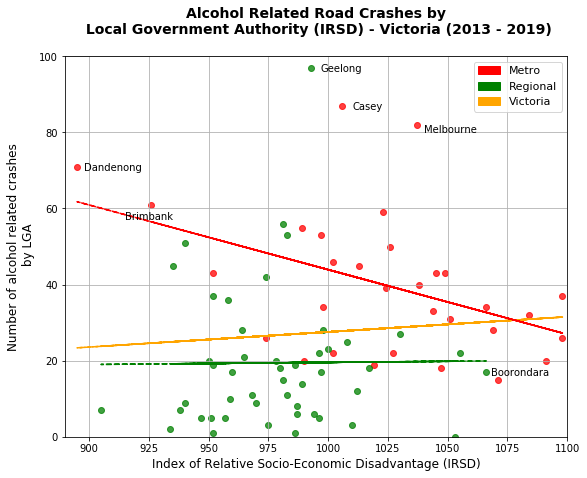

In [44]:
#Plot the linear model on the scatter plot
plt.figure(figsize=(9,7))
plt.scatter(LGA_merged_metro["Index of Relative Socio-Economic Disadvantage (IRSD)"], LGA_merged_metro["alcohol"], facecolors="red", alpha = 0.75)
plt.scatter(LGA_merged_regional["Index of Relative Socio-Economic Disadvantage (IRSD)"], LGA_merged_regional["alcohol"], facecolors="green", alpha = 0.75)
plt.plot(LGA_merged["Index of Relative Socio-Economic Disadvantage (IRSD)"], booze_fit, "--", color="orange")
plt.plot(LGA_merged_metro["Index of Relative Socio-Economic Disadvantage (IRSD)"], booze_fit_m, "--", color="red")
plt.plot(LGA_merged_regional["Index of Relative Socio-Economic Disadvantage (IRSD)"], booze_fit_r, "--", color="green")

plt.xlabel("Index of Relative Socio-Economic Disadvantage (IRSD)", fontsize=12)
plt.ylabel("Number of alcohol related crashes\n by LGA", fontsize=12)
plt.title("Alcohol Related Road Crashes by\n Local Government Authority (IRSD) - Victoria (2013 - 2019)\n", fontsize=14, fontweight="bold")

metro_patch_legend_booze = mpatches.Patch(color="red", label="Metro")
regional_patch_legend_booze = mpatches.Patch(color="green", label="Regional")
overall_patch_legend_booze = mpatches.Patch(color="orange", label="Victoria")
plt.legend(handles=[metro_patch_legend_booze, regional_patch_legend_booze, overall_patch_legend_booze], loc="upper right", fontsize=11)

plt.annotate('Melbourne',(1040,80))
plt.annotate('Dandenong',(898, 70))
plt.annotate('Boorondara',(1068, 16))
plt.annotate('Brimbank',(915, 57))
plt.annotate('C. Goldfields',(878, 9))
plt.annotate('Casey',(1010, 86))
plt.annotate('Geelong',(997, 96))


plt.xlim(890,1100)
plt.ylim(0,100)
plt.grid()
plt.show()

##### Work out overall statistics - by age and gender classifications (Young, Older, Middle Aged)

In [47]:
#Import the CSV holding condensed information for pie charting the summary statistics
grouped_city_or_regional = pd.read_csv("Output/groupedregional.csv")
grouped_city_or_regional.head()

,total_crashes,total_inj,fatal,inj_male,inj_female,old_driver,young_driver,total_pop,inj_per_crash,male_%,female_%,older_%,young_%,percent_fatal,percent_crashes,percent_pop
0,44676,110512,547,60524,44069,2735,13680,4415403,2.473632,0.547669,0.398771,0.061219,0.306205,0.445803,0.708727,0.74608
1,18361,40022,680,22542,16010,1331,5303,1502734,2.179729,0.563240,0.400030,0.072491,0.288819,0.554197,0.291273,0.25392


Text(0.5, 1.0, '% of Accidents in Victoria\n Metro or Regional\n 2013-2019')

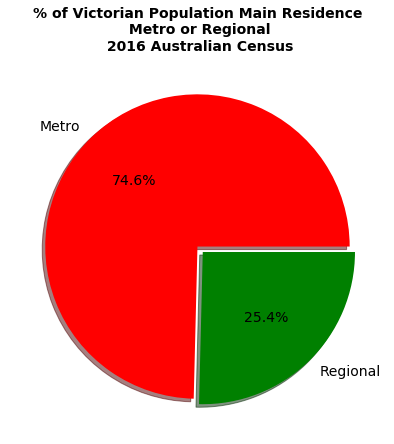

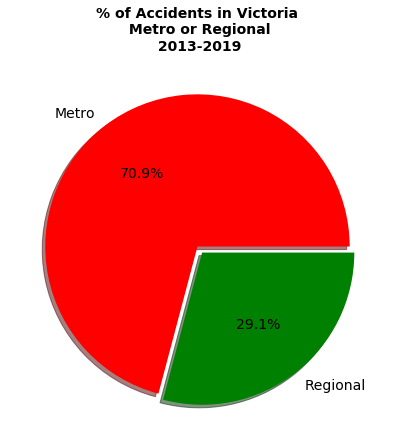

In [48]:
#Do a pie chart to show the % of Victorian accidents and where
#Setup the pie chart
colors = ["red", "green"]
labels = ["Metro", "Regional"]
explode = (0, 0.05)

#Plot the pie charts - population
plt.figure(figsize=(9,7))
plt.pie(grouped_city_or_regional["percent_pop"], colors=colors, autopct="%1.1f%%", shadow=True, labels=labels, explode=explode, textprops={'fontsize': 14})

plt.title("% of Victorian Population Main Residence\n Metro or Regional\n 2016 Australian Census", fontsize=14, fontweight="bold")

#Plot the pie charts - accidents
plt.figure(figsize=(9,7))
plt.pie(grouped_city_or_regional["percent_crashes"], colors=colors, autopct="%1.1f%%", shadow=True, labels=labels, explode=explode, textprops={'fontsize': 14})

plt.title("% of Accidents in Victoria\n Metro or Regional\n 2013-2019", fontsize=14, fontweight="bold")



## Section 2: Speed Limit Restrictions

In [49]:
# Read into csv file
crash_data = pd.read_csv("Resources/Crash_Statistics_Victoria_clean.csv")

# Dropping Unnecessary information
indexNames = crash_data[crash_data['SPEED_ZONE'] == "Camping grounds or off road"].index
crash_data.drop(indexNames , inplace=True)
indexNames = crash_data[crash_data['SPEED_ZONE'] == "Not known"].index
crash_data.drop(indexNames , inplace=True)
indexNames = crash_data[crash_data['SPEED_ZONE'] == "Other speed limit"].index
crash_data.drop(indexNames , inplace=True)
indexNames = crash_data[crash_data['SPEED_ZONE'] == '75 km/hr'].index
crash_data.drop(indexNames , inplace=True)
indexNames = crash_data[crash_data['LIGHT_CONDITION'] == 'Dark Street lights unknown'].index
crash_data.drop(indexNames , inplace=True)
indexNames = crash_data[crash_data['LIGHT_CONDITION'] == 'Unk.'].index
crash_data.drop(indexNames , inplace=True)

# Removing symbol to convert column to interger
crash_data =crash_data.replace(to_replace='km/hr', value='', regex=True)

# Changing type to integer for sorting 
crash_data['SPEED_ZONE'] = crash_data['SPEED_ZONE'].astype(int)

In [50]:
# Calculating number of accidents per speed limit
crash = crash_data.groupby(["SPEED_ZONE"])
crash = crash_data.groupby(["SPEED_ZONE"]).count()
crash =crash['OBJECTID']

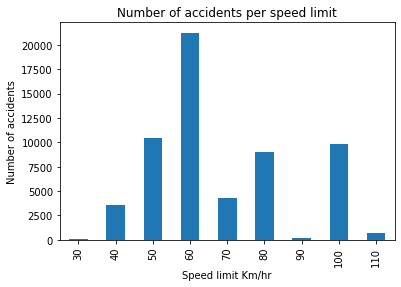

<Figure size 432x288 with 0 Axes>

In [51]:
# Plotting crash data
speed_chart = crash.plot(kind="bar", title="Number of accidents per speed limit")
speed_chart.set_xlabel("Speed limit Km/hr")
speed_chart.set_ylabel("Number of accidents")
plt.show()
plt.tight_layout()

Text(0.5, 0, 'Number of accidents')

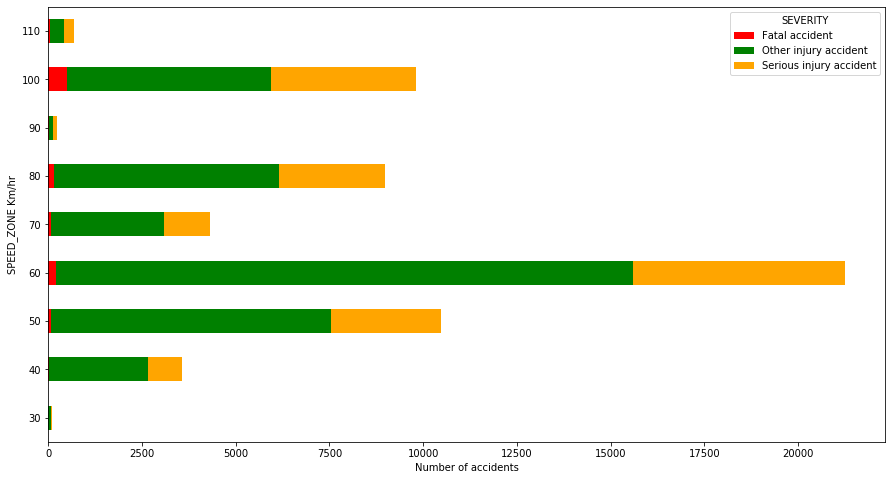

In [52]:
# Calculate number of accidents in each speed limit as accident type
crash = crash_data.groupby(["SPEED_ZONE"])
crash_count= crash["SEVERITY"].value_counts()
crash_type = pd.DataFrame(crash_count)

# Plotting chart showing speed limit to severity
c2 = crash_data.groupby(["SPEED_ZONE"])
crash_count2= crash["SEVERITY"].value_counts().unstack('SEVERITY').fillna(0)
c4 = crash_count2.plot(kind='barh', stacked=True, figsize=(15,8), color=['red', 'green', 'orange'])
c4.set_ylabel("SPEED_ZONE Km/hr")
c4.set_xlabel("Number of accidents")

In [53]:
# Used bins to test range rather that each speed limit separately 
bins = [0,51,81,115]
names = ["30-50","60-80","90-110"]
crash_data["bins"] = pd.DataFrame(pd.cut(crash_data["SPEED_ZONE"], bins, labels=names, include_lowest=True))
binsdf = crash_data.groupby(["bins"])
total_count = binsdf["SEVERITY"].value_counts()
uniquesn_bindf = pd.DataFrame({ "Total Count": total_count})
uniquesn_bindf

Total Count
bins   SEVERITY                            
30-50  Other injury accident          10182
       Serious injury accident         3844
       Fatal accident                   105
60-80  Other injury accident          24390
       Serious injury accident         9717
       Fatal accident                   455
90-110 Other injury accident           5940
       Serious injury accident         4234
       Fatal accident                   551

In [54]:
# Calculate percentage for plotting 100% bar chart
percents_df2 = uniquesn_bindf.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))
pd.options.display.float_format = '{:,.2f}%'.format
percents_df2

Total Count
bins   SEVERITY                            
30-50  Other injury accident         72.05%
       Serious injury accident       27.20%
       Fatal accident                 0.74%
60-80  Other injury accident         70.57%
       Serious injury accident       28.11%
       Fatal accident                 1.32%
90-110 Other injury accident         55.38%
       Serious injury accident       39.48%
       Fatal accident                 5.14%

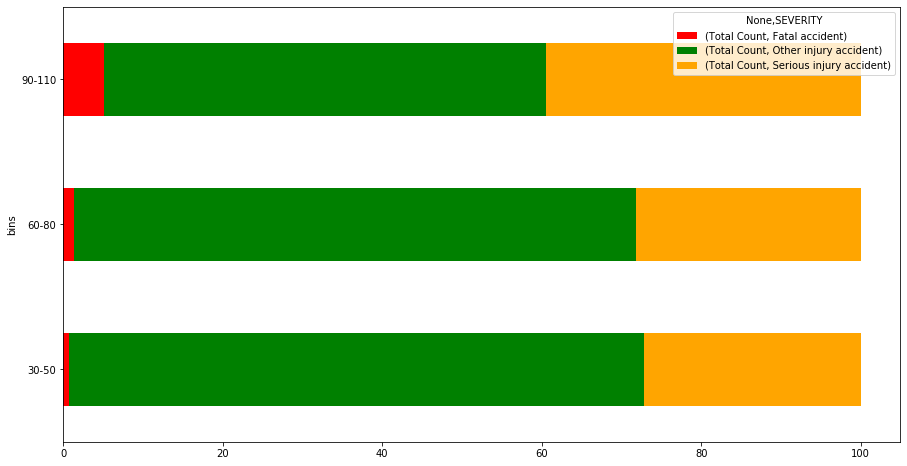

In [55]:
percents_df2.unstack().plot.barh(stacked=True, figsize=(15,8), color=['red', 'green', 'orange'])

In [56]:
# Calculate number of accidents in each speed limit as light condition
crash = crash_data.groupby(["LIGHT_CONDITION"])
crash_count= crash["SEVERITY"].value_counts()
c = pd.DataFrame(crash_count)
c

SEVERITY
LIGHT_CONDITION        SEVERITY                         
Dark No street lights  Other injury accident        1796
                       Serious injury accident      1369
                       Fatal accident                197
Dark Street lights off Other injury accident          90
                       Serious injury accident        39
                       Fatal accident                  6
Dark Street lights on  Other injury accident        6215
                       Serious injury accident      3183
                       Fatal accident                171
Day                    Other injury accident       27619
                       Serious injury accident     11201
                       Fatal accident                641
Dusk/Dawn              Other injury accident        4792
                       Serious injury accident      2003
                       Fatal accident                 96

Text(0.5, 0, 'Number of accidents')

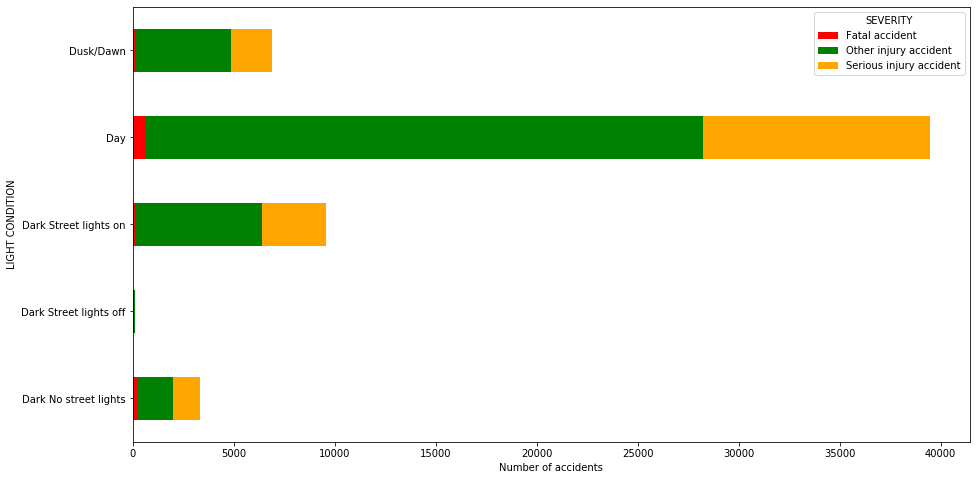

In [57]:
# # Plotting chart showing light condition to severity

c5 = crash_data.groupby(["LIGHT_CONDITION"])
crash_count5= c5["SEVERITY"].value_counts().unstack('SEVERITY').fillna(0)
c6 = crash_count5.plot(kind='barh', stacked=True, figsize=(15,8), color=['red', 'green', 'orange'])
c6.set_ylabel("LIGHT CONDITION")
c6.set_xlabel("Number of accidents")

In [58]:
# Calculate percentage for plotting 100% bar chart
percents_df = c.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))
pd.options.display.float_format = '{:,.2f}%'.format
percents_df

SEVERITY
LIGHT_CONDITION        SEVERITY                         
Dark No street lights  Other injury accident      53.42%
                       Serious injury accident    40.72%
                       Fatal accident              5.86%
Dark Street lights off Other injury accident      66.67%
                       Serious injury accident    28.89%
                       Fatal accident              4.44%
Dark Street lights on  Other injury accident      64.95%
                       Serious injury accident    33.26%
                       Fatal accident              1.79%
Day                    Other injury accident      69.99%
                       Serious injury accident    28.38%
                       Fatal accident              1.62%
Dusk/Dawn              Other injury accident      69.54%
                       Serious injury accident    29.07%
                       Fatal accident              1.39%

## Section 3: Road Repairs & Upgrades 

In [59]:
#read crash data file and have a peak at the data 
crash_data = pd.read_csv("Resources/Crash_Statistics_Victoria_clean.csv")
#remove NA values based on row
crash_data = crash_data.dropna(axis = 0)

#load local government expenditure dataset, skip first row, have a look at top few rows of data
#LGA =  local government agency
pd.set_option("display.max_rows", None, "display.max_columns", None)
localgov = pd.read_csv("Resources/lge_cleanfile.csv", skiprows = 1)

In [60]:
#calculate road expenditure per km in each LGA to use for correlation analysis
localgov["Expense_per_km"] = localgov["Total-expenditure"] / localgov["Total_roadlength"] 

##### Group LGA dataset by LGA name and count of accidents (OBJECTID), reset index to return a dataframe, subset columns from dataframes to create a smaller dataframe

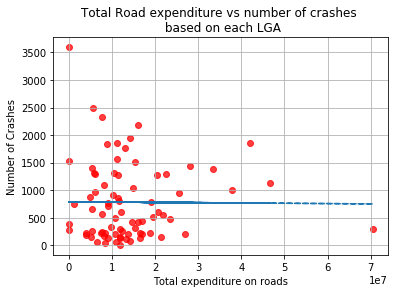

In [61]:
num_accident_perLGA= crash_data.groupby('LGA_NAME')['OBJECTID'].agg('count').reset_index()
expense_per_km = localgov["Expense_per_km"]
total_expenditure = localgov["Total-expenditure"]
total_roadlength = localgov["Total_roadlength"]
total_sealedroad_expense = localgov["Local Roads - Sealed-expenditure"]
total_sealedroad = localgov["Local Roads - Sealed-length"]

#create a dataframe with lga name, expense per km, total expenditure, total road length, total sealed road expense, total length of sealed roads
lga_stats = pd.concat([num_accident_perLGA, expense_per_km, total_expenditure, total_roadlength], axis = 1)

#remove np.inf and np.nan values from resulting dataframe before plotting
lga_stats = lga_stats.replace([np.inf, -np.inf], np.nan).dropna(subset=["Expense_per_km", "OBJECTID", "Total-expenditure", "Total_roadlength"])

#calculate correlation coffecient between total road expense and number of accidents
round(st.pearsonr(lga_stats["Total-expenditure"],lga_stats["OBJECTID"])[0],2)
x_values2 = lga_stats["Total-expenditure"]
y_values2 = lga_stats["OBJECTID"] 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values2, y_values2)

#generating the equation
regress_values = x_values2 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#create the plot and customize 
plt.scatter(x_values2,y_values2, facecolors = "red", alpha = 0.75)
plt.plot(x_values2, regress_values,"--")
#plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Total expenditure on roads')
plt.ylabel('Number of Crashes')
plt.title("Total Road expenditure vs number of crashes \n based on each LGA")
plt.grid()
plt.show()

##### Group LGA dataset by LGA name and total fatalities (FATALITIES), reset index to return a dataframe, subset columns from dataframes to create a smaller dataframe

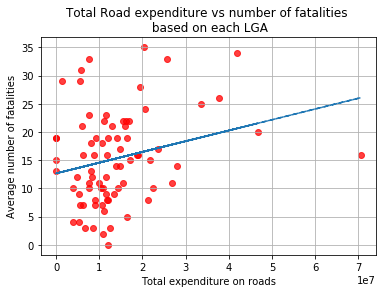

In [62]:
fatalities_perLGA= crash_data.groupby('LGA_NAME')['FATALITY'].agg('sum').reset_index()
expense_per_km = localgov["Expense_per_km"]
total_expenditure = localgov["Total-expenditure"]
total_roadlength = localgov["Total_roadlength"]
total_sealedroad_expense = localgov["Local Roads - Sealed-expenditure"]
total_sealedroad = localgov["Local Roads - Sealed-length"]

#create a data frame with expenses and fatalities
lga_stats = pd.concat([fatalities_perLGA, expense_per_km, total_expenditure, total_roadlength, total_sealedroad, total_sealedroad_expense], axis = 1)
#remove np.nan and np.inf values to avoid errors during plotting
lga_stats = lga_stats.replace([np.inf, -np.inf], np.nan).dropna(subset=["Expense_per_km", "FATALITY", "Total-expenditure", "Total_roadlength"])

#calculate correlation coffecient between total road expense and number of fatalities
round(st.pearsonr(lga_stats["Total-expenditure"],lga_stats["FATALITY"])[0],2)

#create a correlation plot for total road expense  and number of fatalities
x_values5 = lga_stats["Total-expenditure"]
y_values5 = lga_stats["FATALITY"] 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values5, y_values5)

#generating equation
regress_values = x_values5 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#creating plot and customozing
plt.scatter(x_values5,y_values5, facecolors = "red", alpha = 0.75)
plt.plot(x_values5, regress_values,"--")
#plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Total expenditure on roads')
plt.ylabel('Average number of fatalities')
plt.title("Total Road expenditure vs number of fatalities \n based on each LGA")
plt.grid()
plt.show()

## Section 4: Road Safety Cameras

In [63]:
# Bring in data from prepared files
crashstat = pd.read_csv("Output/speedcam_analysis.csv")
speedcam = pd.read_csv("Output/speedcamera.csv")
locmatrix = pd.read_csv("Output/location_matrix.csv")
crashcam = pd.read_csv("Output/crash_w_radius.csv")

FileNotFoundError: [Errno 2] File Output/location_matrix.csv does not exist: 'Output/location_matrix.csv'

##### Find the closest camera to each crash

In [ ]:
# Define function to calculate distance between 2 sets of coordinates
    
def calcdistance(cam_lat, cam_lon, crash_lat, crash_lon):
    
    # Formula to calculate distance
    dlat = crash_lat - cam_lat
    dlon = crash_lon - cam_lon
    a = sin(dlat/2)**2 + cos(cam_lat) * cos(crash_lat) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a))
    r = 6371.01 # Radius of the earth in kilometers
    d = c * r
    
    return d

In [ ]:
# Calculate the radians for the given coordinates for both the camera and crash locations

%%time

locmatrix["distance"] = locmatrix[["lat_R", "lng_R", "LATITUDE_R", "LONGITUDE_R"]].apply(lambda row: calcdistance(row["lat_R"], row["lng_R"], row["LATITUDE_R"], row["LONGITUDE_R"]), axis=1)

locmatrix.head()

In [ ]:
# Keep only the shortest distance between accident and camera

locmatrix = locmatrix.sort_values("distance", ascending=True)
locmatrix = locmatrix.drop_duplicates(subset=["OBJECTID","camera_type"], keep="first")

In [ ]:
# Merge the shortest distance and camera information into the crash statistics data

crashcam = crashstat.merge(locmatrix, on="OBJECTID", suffixes=('','_y'))
crashcam = crashcam.drop(columns=["LATITUDE_y","LONGITUDE_y","postcode_y"
                        ,"lat_y","lng_y","LATITUDE_R",
                       "LONGITUDE_R","lat_R","lng_R"])

In [ ]:
# Classify each accident as within 1 km radius or outside 1 km radius

radius = 1.00 # Metric: Kilometer
crashcam["1km_radius"] = np.where(crashcam["distance"]<=radius, "Y", "N")
#crashcam.to_csv("Output/crash_w_radius.csv", encoding="utf-8", index=False)
crashcam.head()

##### Heatmap for ALL road incidents in Victoria

In [ ]:
heat = crashcam[["OBJECTID","ROAD_GEOMETRY","LGA_NAME","FATALITY","LATITUDE","LONGITUDE","SEVERITY","camera_type","1km_radius"]]

heat_all = heat[["LATITUDE","LONGITUDE"]]
heat_all = [[row["LATITUDE"], row["LONGITUDE"]] for index, row in
                 heat_all.iterrows()]

ma = folium.Map([-37.503995, 145.264296], tiles="CartoDB positron", zoom_start=7)
HeatMap(heat_all).add_to(ma)
ma

##### FATALITIES caused by road incidents in Victoria

In [ ]:
# Construct heatmap

heat = heat[heat["FATALITY"]>0]

heat_fatal_all = heat[["LATITUDE","LONGITUDE"]]
heat_fatal_all = [[row["LATITUDE"], row["LONGITUDE"]] for index, row in
                 heat_fatal_all.iterrows()]

m = folium.Map([-37.503995, 145.264296], tiles="CartoDB positron", zoom_start=7)
HeatMap(heat_fatal_all).add_to(m)
m

In [ ]:
# Statistics of fatalities split by road geometry

crashcam_fatal = crashcam[crashcam["FATALITY"]>0]

grouproadgeo = crashcam_fatal.groupby(["ROAD_GEOMETRY"])
byroadgeo = grouproadgeo["FATALITY"].sum()
pc_byroadgeo = byroadgeo/sum(byroadgeo)*100

summary = pd.DataFrame({
                        "Fatality Count": byroadgeo,
                        "% by Road Geometry": pc_byroadgeo
                        })

summary["Fatality Count"] = summary["Fatality Count"].map('{:,.0f}'.format)
summary["% by Road Geometry"] = summary["% by Road Geometry"].map('{:,.2f}'.format)

summary

In [ ]:
# Statistics of fatalities split by road geometry and accident type

grouproadgeo = crashcam_fatal.groupby(["ROAD_GEOMETRY","ACCIDENT_TYPE"])
byroadgeo = grouproadgeo["FATALITY"].sum()
pc_byroadgeo = byroadgeo/sum(byroadgeo)*100

summary = pd.DataFrame({
                        "Fatality Count": byroadgeo,
                        "% by Road Geometry": pc_byroadgeo
                        })

summary["Fatality Count"] = summary["Fatality Count"].map('{:,.0f}'.format)
summary["% by Road Geometry"] = summary["% by Road Geometry"].map('{:,.2f}'.format)

summary

##### Fatalities within 1 km radius

In [ ]:
# Construct heatmap

heat_1km = heat[heat["1km_radius"]=="Y"]
heat_1km = heat_1km[["LATITUDE","LONGITUDE"]]
heat_1km = [[row["LATITUDE"], row["LONGITUDE"]] for index, row in
            heat_1km.iterrows()]
m_1km = folium.Map([-37.503995, 145.264296], tiles="CartoDB positron", zoom_start=7)
HeatMap(heat_1km).add_to(m_1km)
m_1km

##### Fatalities outside 1 km radius

In [ ]:
heat__not_1km = heat[heat["1km_radius"]=="N"]
heat__not_1km = heat__not_1km[["LATITUDE","LONGITUDE"]]
heat__not_1km = [[row["LATITUDE"], row["LONGITUDE"]] for index, row in
            heat__not_1km.iterrows()]
m_not_1km = folium.Map([-37.503995, 145.264296], tiles="CartoDB positron", zoom_start=7)
HeatMap(heat__not_1km).add_to(m_not_1km)
m_not_1km

In [ ]:
# Statistics grouped by within or out of 1km radius

group_radius = crashcam.groupby(["1km_radius"])
fatality = group_radius["FATALITY"].sum()
vehicles = group_radius["NO_OF_VEHICLES"].sum()
passengervehicle = group_radius["PASSENGERVEHICLE"].sum()
proportion_passengervehicle = passengervehicle/vehicles*100
proportion_fatality = fatality/sum(fatality)*100
avgdistance = group_radius["distance"].mean()

summary_radius = pd.DataFrame({
                                "Fatality Count": fatality,
                                "% Fatality": proportion_fatality,
                                "Vehicle Count": vehicles,
                                "Passenger Vehicle Count": passengervehicle,
                                "% Passenger Vehicle": proportion_passengervehicle,
                                "Average Distance": avgdistance
                                })

summary_radius["Fatality Count"] = summary_radius["Fatality Count"].map('{:,.0f}'.format)
summary_radius["Vehicle Count"] = summary_radius["Vehicle Count"].map('{:,.0f}'.format)
summary_radius["Passenger Vehicle Count"] = summary_radius["Passenger Vehicle Count"].map('{:,.0f}'.format)
summary_radius["% Passenger Vehicle"] = summary_radius["% Passenger Vehicle"].map('{:,.2f}'.format)
summary_radius["% Fatality"] = summary_radius["% Fatality"].map('{:,.2f}'.format)
summary_radius["Average Distance"] = summary_radius["Average Distance"].map('{:,.2f}km'.format)

summary_radius

In [ ]:
# Statisitics grouped by within or out of 1km radius and road geometry

group_camtype_region_radius = crashcam.groupby(["1km_radius","ROAD_GEOMETRY"])
fatality = group_camtype_region_radius["FATALITY"].sum()
proportion_fatality_bytype = fatality/fatality.groupby(["1km_radius"]).sum()*100

summary_camtype_region_radius = pd.DataFrame({
                                "Fatality Count": fatality,
                                "% Fatality by Type": proportion_fatality_bytype
                                })

summary_camtype_region_radius["Fatality Count"] = summary_camtype_region_radius["Fatality Count"].map('{:,.0f}'.format)
summary_camtype_region_radius["% Fatality by Type"] = summary_camtype_region_radius["% Fatality by Type"].map('{:,.2f}%'.format)

summary_camtype_region_radius

In [ ]:
# Statisitics grouped by within or out of 1km radius and RMA

group_camtype_region_radius = crashcam.groupby(["1km_radius","RMA"])
fatality = group_camtype_region_radius["FATALITY"].sum()
proportion_fatality_bytype = fatality/fatality.groupby(["1km_radius"]).sum()*100

summary_camtype_region_radius = pd.DataFrame({
                                "Fatality Count": fatality,
                                "% Fatality by Type": proportion_fatality_bytype
                                })

summary_camtype_region_radius["Fatality Count"] = summary_camtype_region_radius["Fatality Count"].map('{:,.0f}'.format)
summary_camtype_region_radius["% Fatality by Type"] = summary_camtype_region_radius["% Fatality by Type"].map('{:,.2f}%'.format)

summary_camtype_region_radius

##### Welch test to determine if speed cameras are effective in reducing road toll

In [ ]:
#Null hypothesis: Cameras have no effect on fatalities
#Alternative hypothesis: Cameras can help save lives 

st.ttest_ind(crashcam['FATALITY'][crashcam['1km_radius'] == 'Y'],
             crashcam['FATALITY'][crashcam['1km_radius'] == 'N'],
            equal_var=False)

#We can reject null hypothesis

##### Looking at data by camera type

In [ ]:
# Statistics grouped by within or out of 1km radius and camera_type

group_camtype_radius = crashcam.groupby(["camera_type","1km_radius"])
accidents = group_camtype_radius["OBJECTID"].count()
fatality = group_camtype_radius["FATALITY"].sum()
avgdistance = group_camtype_radius["distance"].mean()
vehicles = group_camtype_radius["NO_OF_VEHICLES"].sum()
proportion_accidents_bytype = accidents/accidents.groupby(["camera_type"]).sum()*100
proportion_fatality_bytype = fatality/fatality.groupby(["camera_type"]).sum()*100
proportion_accidents = accidents/sum(accidents)*100
proportion_fatality = fatality/sum(fatality)*100

summary_camtype_radius = pd.DataFrame({
                                "Accident Count": accidents,
                                "Fatality Count": fatality,
                                "Average Distance": avgdistance,
                                "Vehicle Count": vehicles,
                                "% Accident by Type": proportion_accidents_bytype,
                                "% Fatality by Type": proportion_fatality_bytype,
                                "% Accident": proportion_accidents,
                                "% Fatality": proportion_fatality
                                })

summary_camtype_radius["Accident Count"] = summary_camtype_radius["Accident Count"].map('{:,.0f}'.format)
summary_camtype_radius["Fatality Count"] = summary_camtype_radius["Fatality Count"].map('{:,.0f}'.format)
summary_camtype_radius["Average Distance"] = summary_camtype_radius["Average Distance"].map('{:,.2f}km'.format)
summary_camtype_radius["Vehicle Count"] = summary_camtype_radius["Vehicle Count"].map('{:,.0f}'.format)
summary_camtype_radius["% Accident by Type"] = summary_camtype_radius["% Accident by Type"].map('{:,.2f}%'.format)
summary_camtype_radius["% Fatality by Type"] = summary_camtype_radius["% Fatality by Type"].map('{:,.2f}%'.format)
summary_camtype_radius["% Accident"] = summary_camtype_radius["% Accident"].map('{:,.2f}%'.format)
summary_camtype_radius["% Fatality"] = summary_camtype_radius["% Fatality"].map('{:,.2f}%'.format)

summary_camtype_radius

In [ ]:
# Visualise difference between camera types in a horizontal bar chart

group_camtype_radius = crashcam.groupby(["camera_type","1km_radius"])
fatality = pd.DataFrame(group_camtype_radius["FATALITY"].sum())
fatality = fatality.reset_index()

plot = fatality.pivot(index="camera_type", columns="1km_radius")
plot = plot.apply(lambda x: x*100/sum(x), axis=1)

ax = plot.plot(kind="barh",stacked=True, color=["red","green"])
plt.legend(["Camera Outside 1km Radius", "Camera Within 1km Radius"])
plt.title("Number of Fatality by Distance from Cameras")
plt.ylabel("Camera Type")
plt.xlabel("% Number of Fatality")

In [ ]:
# Plot density graph by nearest distance by camera type

value = "distance"

fatality_no = crashcam_fatal.pivot(index="OBJECTID", columns="camera_type")
fatality_no.reset_index(inplace=True)

freeway = pd.DataFrame(fatality_no["OBJECTID"])
freeway[value] = fatality_no[value]["Freeway"]
freeway["ROAD_GEOMETRY"] = fatality_no["ROAD_GEOMETRY"]["Freeway"]
freeway["1km_radius"] = fatality_no["1km_radius"]["Freeway"]
freeway = freeway.dropna(subset=[value])
freeway = freeway.reset_index()

wetfilm = pd.DataFrame(fatality_no["OBJECTID"])
wetfilm[value] = fatality_no[value]["Wet film"]
wetfilm["ROAD_GEOMETRY"] = fatality_no["ROAD_GEOMETRY"]["Wet film"]
wetfilm["1km_radius"] = fatality_no["1km_radius"]["Wet film"]
wetfilm = wetfilm.dropna(subset=[value])
wetfilm = wetfilm.reset_index()

p2p = pd.DataFrame(fatality_no["OBJECTID"])
p2p[value] = fatality_no[value]["Point to point"]
p2p["ROAD_GEOMETRY"] = fatality_no["ROAD_GEOMETRY"]["Point to point"]
p2p["1km_radius"] = fatality_no["1km_radius"]["Point to point"]
p2p = p2p.dropna(subset=[value])
p2p = p2p.reset_index()

intersections = ['T intersection', 'Cross intersection',
                'Multiple intersection','Y intersection']
intersection = pd.DataFrame(fatality_no["OBJECTID"])
intersection[value] = fatality_no[value]["Intersection"]
intersection["ROAD_GEOMETRY"] = fatality_no["ROAD_GEOMETRY"]["Intersection"]
intersection["1km_radius"] = fatality_no["1km_radius"]["Intersection"]
intersection = intersection.dropna(subset=[value])
intersection = intersection[intersection["ROAD_GEOMETRY"].isin(intersections)]
intersection = intersection.reset_index()

camtypes = [freeway[value], wetfilm[value], p2p[value], intersection[value]]
label = ["Freeway", "Wet Film", "Point to Point", "Intersection"]

types=0

plt.figure(figsize=(10,4))

for camtype in camtypes:
    
    sns.distplot(camtype,
                hist=False,
                kde=True, 
                kde_kws={'linewidth': 3},
                label=label[types]
                )
        
    types=types+1

plt.legend(title="Camera Type")
plt.title("Density Plot of Distance of Fatal Accidents from Nearest Camera")
plt.xlabel("Distance (km)")
plt.ylabel("Density of Fatal Accidents")
plt.xlim(-5,35)
plt.ylim(0,0.33)
plt.axvline(1, color="black", linewidth=3, ls=':')
plt.show

In [ ]:
crashcam_fatal = crashcam[crashcam["FATALITY"]>0]

g = sns.PairGrid(crashcam_fatal, vars=["FATALITY","distance","postcode"],
                hue="1km_radius", palette=(["green","red"]))
g.map(plt.scatter, alpha=0.7)
g.add_legend()

##### ANOVA to test if performance is equal between camera types in reducing road toll

In [ ]:
#Null hypothesis: All camera types are equal in preventing road fatalities
#Alternative hypothesis: At least one camera type is more or less effective than other camera types

#Dependent variable = camera_type
#Independent variable = fatality

stats.f_oneway(crashcam_fatal['FATALITY'][crashcam_fatal['camera_type'] == 'Freeway'],
               crashcam_fatal['FATALITY'][crashcam_fatal['camera_type'] == 'Wet film'],
               crashcam_fatal['FATALITY'][crashcam_fatal['camera_type'] == 'Point to point'],
               crashcam_fatal['FATALITY'][crashcam_fatal['camera_type'] == 'Intersection'])

#At pvalue of 0.5 which is significantly greater than pvalue 0.05, we are not able to reject our Null Hypothesis.
#Therefore, at least one camera type is more or less effective than other camera types 